In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
import matplotlib.pyplot as plt

# create discretizer
kbins = KBinsDiscretizer(n_bins=2, strategy='uniform', encode='ordinal')
# read spambase.data into pandas dataframe
df = pd.read_csv('spambase.data',header = None)

df = df[(df[57] == 1)]
print(len(df))
df.head()
#df[(df[0] <= 2.38)]

1813


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
def plot_bins(values):
    """visualizes the number of observations in each bin"""

    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

def show_bins(bins):
    """Shows the ranges of values the bins comprises"""

    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')

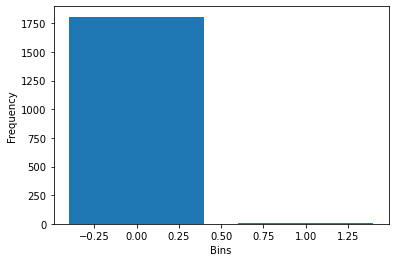

Bin 0: 0.0 -> 2.27
Bin 1: 2.27 -> 4.54


In [3]:
#bins = [2, 2, 2, 2]
att = df.iloc[:, 0:1]
att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# show results
plot_bins(Counter(list(att_bin.flatten())))
show_bins(kbins.bin_edges_[0])

In [4]:
# Equal-Width Discretization
frames = []
for i in range(0,57):
    bin = kbins.fit_transform(np.array(df.iloc[:, i:i + 1]).reshape(-1,1))
    frames.append(pd.DataFrame(bin, columns=[str(i)]))

data = pd.concat(frames, axis=1)
data
#att1 = df.iloc[:, 0:1]
#att2 = df.iloc[:, 1:2]
#att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# att_bin48 = kbins.fit_transform(np.array(att48).reshape(-1,48))
# att_bin54 = kbins.fit_transform(np.array(att54).reshape(-1,6))
# att_bin55 = kbins.fit_transform(np.array(att55).reshape(-1,1))
# att_bin56 = kbins.fit_transform(np.array(att56).reshape(-1,1))
# att_bin57 = kbins.fit_transform(np.array(att57).reshape(-1,1))
#print(len(att_bin))

#att_bin_df = pd.DataFrame(att_bin)
# att_bin_df48 = pd.DataFrame(att_bin48)
# att_bin_df54 = pd.DataFrame(att_bin54)
# att_bin_df55 = pd.DataFrame(att_bin55)
# att_bin_df56 = pd.DataFrame(att_bin56)
# att_bin_df57 = pd.DataFrame(att_bin57)
#att_bin_df.head(100)
# show results
#plot_bins(Counter(list(att_bin.flatten())))
#show_bins(kbins.bin_edges_[0])
# frames = [att_bin_df48, att_bin_df54, att_bin_df55, att_bin_df56, att_bin_df57]

#data = pd.concat(frames, axis=1)
#data.head(100)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df[(df[1] <= 7.14)]
for k in range(0,57):
    print(str(k) + " " + str(len(data[(data[str(k)] == 2)])))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0


In [7]:
def LGG(x,y):




def LGGSET(data):
    head = NULL
    for index, row in data.iterrows():
        if index == 0:
            head = row
        else:
            head = LGG(head,row)
    return head




        #print (index,row["Fee"], row["Courses"])

IndentationError: expected an indented block (3546467097.py, line 4)